# Sentiment Analysis of Financial News Using NLTK

We have to predict the sentiment of fiancial news using nltk

#About Dataset

This dataset contains 3 csv file

cnbc headline   (3080, 3)

gaurdian headline   (17800, 2)

reuters headline   (32770, 3)


# Columns Provided in the Dataset

cnbc headline
1. time
2. headlines
3. Description

gaurdian headline
1. time
2. headline

reuters headline
1. time
2. headline
3. description


# What is NLTK ?

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).

It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.


https://medium.com/@ODSC/intro-to-language-processing-with-the-nltk-59aa26b9d056



# What is sentiment analysis ?

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.



https://monkeylearn.com/sentiment-analysis/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
# Import all the required libraries 
import re
import pandas as pd
import numpy as np
import os
import datetime as dt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import string
!pip install emoji
import emoji
pd.set_option('display.max_rows',500)
import warnings
warnings.filterwarnings("ignore")
#import stopwords and text processing libraries
from collections import Counter
import string
import unicodedata
import nltk
nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import  TfidfVectorizer 
from sklearn.decomposition import NMF
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [ ]:
#import machine learning libraries





# Basic EDA on cnbc_headlines dataset

In [19]:
# Read csv file of cnbc headlines using pandas
df_cnbc = pd.read_csv('/content/drive/MyDrive/Projects/Sentiment Analysis of Financial News/cnbc_headlines.csv')
df_cnbc

Headlines  \
0     Jim Cramer: A better way to invest in the Covi...   
1        Cramer's lightning round: I would own Teradyne   
2                                                   NaN   
3     Cramer's week ahead: Big week for earnings, ev...   
4     IQ Capital CEO Keith Bliss says tech and healt...   
...                                                 ...   
3075                       Markets lack Christmas cheer   
3076  Cramer Remix: The biggest mistake you can make...   
3077  Cramer says owning too many stocks and too lit...   
3078  Cramer: I helped investors through the 2010 fl...   
3079  Cramer: Never buy a stock all at once — you'll...   

                                Time  \
0      7:51  PM ET Fri, 17 July 2020   
1      7:33  PM ET Fri, 17 July 2020   
2                                NaN   
3      7:25  PM ET Fri, 17 July 2020   
4      4:24  PM ET Fri, 17 July 2020   
...                              ...   
3075   10:15  AM ET Tue, 26 Dec 2017   
3076  11:12  AM ET Thu, 20 Sept 2018   
3077    7:07  PM ET Fri, 22 Dec 2017   
3078    7:07  PM ET Fri, 22 Dec 2017   
3079    6:52  PM ET Fri, 22 Dec 2017   

                                            Description  
0     "Mad Money" host Jim Cramer recommended buying...  
1     "Mad Money" host Jim Cramer rings the lightnin...  
2                                                   NaN  
3     "We'll pay more for the earnings of the non-Co...  
4     Keith Bliss, IQ Capital CEO, joins "Closing Be...  
...                                                 ...  
3075  According to Kensho, here's how markets have f...  
3076  Jim Cramer revealed his top rule when it comes...  
3077  Jim Cramer broke down why owning fewer stocks ...  
3078  Jim Cramer built on his "nobody ever made a di...  
3079  Jim Cramer doubled down on his key investing r...  

[3080 rows x 3 columns]

In [20]:
# check the shape of cnbc headline dataset
df_cnbc.shape

(3080, 3)

In [21]:
# Check all the columns in the cnbc headline dataset
df_cnbc.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [22]:
# Check which columns are having categorical, numerical or boolean values
df_cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [23]:
# Check for missing values in all the columnns of cnbc headline dataset
df_cnbc.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

There is 280 missing values in headlines, description and time

In [24]:
 # drop nan values in cnbc headline dataset
df_cnbc.dropna(inplace = True)

In [25]:
df_cnbc

Headlines  \
0     Jim Cramer: A better way to invest in the Covi...   
1        Cramer's lightning round: I would own Teradyne   
3     Cramer's week ahead: Big week for earnings, ev...   
4     IQ Capital CEO Keith Bliss says tech and healt...   
5     Wall Street delivered the 'kind of pullback I'...   
...                                                 ...   
3075                       Markets lack Christmas cheer   
3076  Cramer Remix: The biggest mistake you can make...   
3077  Cramer says owning too many stocks and too lit...   
3078  Cramer: I helped investors through the 2010 fl...   
3079  Cramer: Never buy a stock all at once — you'll...   

                                Time  \
0      7:51  PM ET Fri, 17 July 2020   
1      7:33  PM ET Fri, 17 July 2020   
3      7:25  PM ET Fri, 17 July 2020   
4      4:24  PM ET Fri, 17 July 2020   
5      7:36  PM ET Thu, 16 July 2020   
...                              ...   
3075   10:15  AM ET Tue, 26 Dec 2017   
3076  11:12  AM ET Thu, 20 Sept 2018   
3077    7:07  PM ET Fri, 22 Dec 2017   
3078    7:07  PM ET Fri, 22 Dec 2017   
3079    6:52  PM ET Fri, 22 Dec 2017   

                                            Description  
0     "Mad Money" host Jim Cramer recommended buying...  
1     "Mad Money" host Jim Cramer rings the lightnin...  
3     "We'll pay more for the earnings of the non-Co...  
4     Keith Bliss, IQ Capital CEO, joins "Closing Be...  
5     "Look for the stocks of high-quality companies...  
...                                                 ...  
3075  According to Kensho, here's how markets have f...  
3076  Jim Cramer revealed his top rule when it comes...  
3077  Jim Cramer broke down why owning fewer stocks ...  
3078  Jim Cramer built on his "nobody ever made a di...  
3079  Jim Cramer doubled down on his key investing r...  

[2800 rows x 3 columns]

In [27]:
# drop the duplicate rows in the dataset keep the first one
df_cnbc.drop_duplicates(keep = 'first', inplace=True)

In [28]:
# check the shape of cnbc headline dataset
df_cnbc.shape

(2800, 3)

In [35]:
df_cnbc.reset_index(drop = True, inplace = True)

# Basic EDA on Gaurdian headlines dataset

In [38]:
# Read csv file of gaurdian headlines using pandas
df_guardian = pd.read_csv('/content/drive/MyDrive/Projects/Sentiment Analysis of Financial News/guardian_headlines.csv')
df_guardian

Time                                          Headlines
0      18-Jul-20   Johnson is asking Santa for a Christmas recovery
1      18-Jul-20  ‘I now fear the worst’: four grim tales of wor...
2      18-Jul-20  Five key areas Sunak must tackle to serve up e...
3      18-Jul-20  Covid-19 leaves firms ‘fatally ill-prepared’ f...
4      18-Jul-20  The Week in Patriarchy  \n\n\n  Bacardi's 'lad...
...          ...                                                ...
17795  17-Dec-17  How investing in solar energy can create a bri...
17796  17-Dec-17     Poundland suppliers hit by insurance downgrade
17797  17-Dec-17  Cryptocurrencies: City watchdog to investigate...
17798  17-Dec-17  Unilever sells household name spreads to KKR f...
17799  17-Dec-17  The Guardian view on Ryanair’s model: a union-...

[17800 rows x 2 columns]

Time                                          Headlines
0  18-Jul-20   Johnson is asking Santa for a Christmas recovery
1  18-Jul-20  ‘I now fear the worst’: four grim tales of wor...
2  18-Jul-20  Five key areas Sunak must tackle to serve up e...
3  18-Jul-20  Covid-19 leaves firms ‘fatally ill-prepared’ f...
4  18-Jul-20  The Week in Patriarchy  \n\n\n  Bacardi's 'lad...

In [40]:
#check the shape of gaurdian headline dataset
df_guardian.shape

(17800, 2)

In [41]:
#check columns of gaurdian headline
df_guardian.columns

Index(['Time', 'Headlines'], dtype='object')

In [43]:
# Check which columns are having categorical, numerical or boolean values
df_guardian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [44]:
# check null values in gaurdian headlines dataset
df_guardian.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [45]:
# drop duplicate rows in headlines and keep the first one
df_guardian.drop_duplicates(keep = 'first', inplace = True)

In [47]:
df_guardian.reset_index(drop = True, inplace = True)
df_guardian

Time                                          Headlines
0      18-Jul-20   Johnson is asking Santa for a Christmas recovery
1      18-Jul-20  ‘I now fear the worst’: four grim tales of wor...
2      18-Jul-20  Five key areas Sunak must tackle to serve up e...
3      18-Jul-20  Covid-19 leaves firms ‘fatally ill-prepared’ f...
4      18-Jul-20  The Week in Patriarchy  \n\n\n  Bacardi's 'lad...
...          ...                                                ...
17795  17-Dec-17  How investing in solar energy can create a bri...
17796  17-Dec-17     Poundland suppliers hit by insurance downgrade
17797  17-Dec-17  Cryptocurrencies: City watchdog to investigate...
17798  17-Dec-17  Unilever sells household name spreads to KKR f...
17799  17-Dec-17  The Guardian view on Ryanair’s model: a union-...

[17800 rows x 2 columns]

# Basic EDA on reuters headlines

In [48]:
# Read csv file of reuters headlines using using pandas
df_reuters = pd.read_csv('/content/drive/MyDrive/Projects/Sentiment Analysis of Financial News/reuters_headlines.csv')
df_reuters

Headlines         Time  \
0      TikTok considers London and other locations fo...  Jul 18 2020   
1      Disney cuts ad spending on Facebook amid growi...  Jul 18 2020   
2      Trail of missing Wirecard executive leads to B...  Jul 18 2020   
3      Twitter says attackers downloaded data from up...  Jul 18 2020   
4      U.S. Republicans seek liability protections as...  Jul 17 2020   
...                                                  ...          ...   
32765  Malaysia says never hired British data firm at...  Mar 20 2018   
32766  Prosecutors search Volkswagen headquarters in ...  Mar 20 2018   
32767   McDonald's sets greenhouse gas reduction targets  Mar 20 2018   
32768  Pratt & Whitney to deliver spare A320neo engin...  Mar 20 2018   
32769  UK will always consider ways to improve data l...  Mar 20 2018   

                                             Description  
0      TikTok has been in discussions with the UK gov...  
1      Walt Disney  has become the latest company to ...  
2      Former Wirecard  chief operating officer Jan M...  
3      Twitter Inc said on Saturday that hackers were...  
4      A battle in the U.S. Congress over a new coron...  
...                                                  ...  
32765  The Malaysian government and the ruling party ...  
32766  German prosecutors said on Tuesday they had se...  
32767  McDonald's Corp on Tuesday announced an approv...  
32768  Pratt & Whitney will soon begin deliveries of ...  
32769  Britain will consider any suggestions to give ...  

[32770 rows x 3 columns]

Headlines  ...                                        Description
0  TikTok considers London and other locations fo...  ...  TikTok has been in discussions with the UK gov...
1  Disney cuts ad spending on Facebook amid growi...  ...  Walt Disney  has become the latest company to ...
2  Trail of missing Wirecard executive leads to B...  ...  Former Wirecard  chief operating officer Jan M...
3  Twitter says attackers downloaded data from up...  ...  Twitter Inc said on Saturday that hackers were...
4  U.S. Republicans seek liability protections as...  ...  A battle in the U.S. Congress over a new coron...

[5 rows x 3 columns]

In [49]:
#check the shape of reuters headlines dataset
df_reuters.shape

(32770, 3)

In [50]:
#check the columns of reuters headline dataset
df_reuters.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [51]:
# Check which columns are having categorical, numerical or boolean values
df_reuters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [52]:
# Check for missing values in all the columnns of reuters headlines dataset
df_reuters.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [54]:
#drop the duplicate rows in reuters headlines dataset and keep the first one
df_reuters.drop_duplicates(keep ='first', inplace = True)

In [55]:
df_reuters.reset_index(drop = True, inplace = True)

#Making some functions that we will need  ahead

Preprocessing 

1. **Lowercase** - It is necessary to convert the text to lower case as it is case sensitive.

2. **remove punctuations** -  The punctuations present in the text do not add value to the data. The punctuation, when attached to any word, will create a problem in differentiating with other words. so we have to get rid of them.

3. **remove stopwords** -  Stopwords include: I, he, she, and, but, was were, being, have, etc, which do not add meaning to the data. So these words must be removed which helps to reduce the features from our data. These are removed after tokenizing the text.

4. **stemming** -  A technique that takes the word to its root form. It just removes suffixes from the words. The stemmed word might not be part of the dictionary, i.e it will not necessarily give meaning.

5. **lemmatizing** -  Takes the word to its root form called Lemma. It helps to bring words to their dictionary form. It is applied to nouns by default. It is more accurate as it uses more informed analysis to create groups of words with similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.


https://youtu.be/lMQzEk5vht4

https://www.pluralsight.com/guides/importance-of-text-pre-processing

In [68]:
# create a function for preprocessing 
def preprocess(x):
  #convert all to lowercase
  x = x.lower()
  #remove puntuations
  remove_punct = str.maketrans('', '', string.punctuation)
  x = x.translate(remove_punct)
  #remove stopword
  stopwordslist = stopwords.words('english')
  tokens = word_tokenize(x)
  result = [w for w in tokens if not w in stopwordslist] 

  #stemming
  ps = PorterStemmer()
  stemwords = [ps.stem(w) for w in result]
  
  #lemmitizing
  lemmatizer = WordNetLemmatizer()
  lemmawords = [lemmatizer.lemmatize(w) for w in stemwords]
  
  return ( " ".join(lemmawords))
  

SENTIMENT ANAYSIS

https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [58]:
# import sentiment intensity analyzer
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# create sentiment intensity analyzer object
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [73]:
#fuction to  decide sentiment as positive, negative and neutral
def polarity(a):
 return sid.polarity_scores(a)['compound']

# Now working with description on datasets

In [60]:
# concatenate cnbc headlines dataset and reuters headline dataset
df_concatened = pd.concat([df_cnbc, df_reuters], axis = 0)

In [61]:
#check the shape of this new dataset
df_concatened.shape

(35515, 3)

In [62]:
#make a copy of new dataset 
df_concatened_copy = df_concatened.copy()

In [69]:
# apply preprocessing to the description of new dataset
df_concatened['Description'] = df_concatened['Description'].apply(lambda x : preprocess(x))
df_concatened

Headlines  \
0      Jim Cramer: A better way to invest in the Covi...   
1         Cramer's lightning round: I would own Teradyne   
2      Cramer's week ahead: Big week for earnings, ev...   
3      IQ Capital CEO Keith Bliss says tech and healt...   
4      Wall Street delivered the 'kind of pullback I'...   
...                                                  ...   
32710  Malaysia says never hired British data firm at...   
32711  Prosecutors search Volkswagen headquarters in ...   
32712   McDonald's sets greenhouse gas reduction targets   
32713  Pratt & Whitney to deliver spare A320neo engin...   
32714  UK will always consider ways to improve data l...   

                                 Time  \
0       7:51  PM ET Fri, 17 July 2020   
1       7:33  PM ET Fri, 17 July 2020   
2       7:25  PM ET Fri, 17 July 2020   
3       4:24  PM ET Fri, 17 July 2020   
4       7:36  PM ET Thu, 16 July 2020   
...                               ...   
32710                     Mar 20 2018   
32711                     Mar 20 2018   
32712                     Mar 20 2018   
32713                     Mar 20 2018   
32714                     Mar 20 2018   

                                             Description  
0      mad money host jim cramer recommend buy four c...  
1      mad money host jim cramer ring lightn round be...  
2      well pay earn noncovid compani lancet publish ...  
3      keith bliss iq capit ceo join close bell talk ...  
4      look stock highqual compani go lower even thou...  
...                                                  ...  
32710  malaysian govern rule parti tuesday deni ever ...  
32711  german prosecutor said tuesday search volkswag...  
32712  mcdonald corp tuesday announc approv scienc ba...  
32713  pratt whitney soon begin deliveri spare engin ...  
32714  britain consid suggest give bodi charg uphold ...  

[35515 rows x 3 columns]

In [82]:
# analyze polarity score of values in description and  add new column of it in dataset
df_concatened['ds_score'] = df_concatened['Description'].apply(lambda x: polarity(x))

In [83]:
def assign_sentiment(x):
  if x > 0:
    return 'Positive'
  if x < 0:
    return 'Negative'
  if x == 0:
    return 'Neutral'
df_concatend['ds_score'] = df_concatend['ds_score'].apply(lambda x : assign_sentiment(x))

TypeError: ignored

In [ ]:
# apply the function  which decides sentiment to  polarity score column


Headlines  ...  ds_score
0      Jim Cramer: A better way to invest in the Covi...  ...   Postive
1         Cramer's lightning round: I would own Teradyne  ...  Negative
2      Cramer's week ahead: Big week for earnings, ev...  ...   Postive
3      IQ Capital CEO Keith Bliss says tech and healt...  ...   Postive
4      Wall Street delivered the 'kind of pullback I'...  ...  Negative
...                                                  ...  ...       ...
32668  Malaysia says never hired British data firm at...  ...   Neutral
32669  Prosecutors search Volkswagen headquarters in ...  ...   Neutral
32670   McDonald's sets greenhouse gas reduction targets  ...  Negative
32671  Pratt & Whitney to deliver spare A320neo engin...  ...  Negative
32672  UK will always consider ways to improve data l...  ...   Postive

[35463 rows x 4 columns]

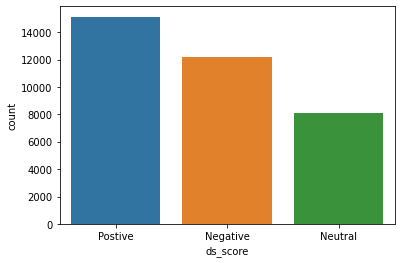

In [ ]:
# plot a count plot on description score column


In the description 

there are approx

14000 positive statment

12000 negative statment

8000 neutral statment

In [ ]:
# pie chart on description score column


In the dataset 

description contains

42.6% positive statments

34.5% negtive statements

22.9% neutral statments

# Modelling on description 

In [ ]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212


LINEAR SUPPORT VECTOR MACHINE


In [ ]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model



# Fit the pipeline to the data

# predict on test dataset

# print accuracy score

#print confusion matrix

#print classification report


MODEL - LINEAR SVC
accuracy score: 93.43%
[[1122   48   54]
 [  26  771   19]
 [  53   33 1421]]
              precision    recall  f1-score   support

    Negative       0.93      0.92      0.93      1224
     Neutral       0.90      0.94      0.92       816
     Postive       0.95      0.94      0.95      1507

    accuracy                           0.93      3547
   macro avg       0.93      0.93      0.93      3547
weighted avg       0.93      0.93      0.93      3547

CPU times: user 2.1 s, sys: 90.5 ms, total: 2.19 s
Wall time: 2.19 s


LOGISTIC REGRESSION


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression


# fit the pipeline to the train data
 

# predict on test dataset
 
#print accuracy
 

#print confusion matrix
 
# print classification report
 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MODEL - LOGISTIC REGRESSION
accuracy: 57.26%
[[ 672  145  407]
 [ 191  291  334]
 [ 249  190 1068]]
              precision    recall  f1-score   support

    Negative       0.60      0.55      0.58      1224
     Neutral       0.46      0.36      0.40       816
     Postive       0.59      0.71      0.64      1507

    accuracy                           0.57      3547
   macro avg       0.55      0.54      0.54      3547
weighted avg       0.57      0.57      0.57      3547

CPU times: user 11 s, sys: 5.99 s, total: 17 s
Wall time: 11.4 s


MULTINOMIAL NAIVE BAYES


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB
 

# fit the pipeline to the train data
 
#predict on test data


#print accuracy
 
#print confusion matrix
 
# print classification report
 

MULTINOMIAL NAIVE BAYES
accuracy: 57.26%
[[ 672  145  407]
 [ 191  291  334]
 [ 249  190 1068]]
              precision    recall  f1-score   support

    Negative       0.60      0.55      0.58      1224
     Neutral       0.46      0.36      0.40       816
     Postive       0.59      0.71      0.64      1507

    accuracy                           0.57      3547
   macro avg       0.55      0.54      0.54      3547
weighted avg       0.57      0.57      0.57      3547

CPU times: user 5.87 s, sys: 77.8 ms, total: 5.95 s
Wall time: 5.93 s


BERNOULLI NAIVE BAYES


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB



# fit the pipeline to the train data

#predict on test dataset

#print accuracy

#print confusion matrix


# print classification report


BERNOULLIS NAIVE BAYES
accuracy: 57.26%
[[ 672  145  407]
 [ 191  291  334]
 [ 249  190 1068]]
              precision    recall  f1-score   support

    Negative       0.60      0.55      0.58      1224
     Neutral       0.46      0.36      0.40       816
     Postive       0.59      0.71      0.64      1507

    accuracy                           0.57      3547
   macro avg       0.55      0.54      0.54      3547
weighted avg       0.57      0.57      0.57      3547

CPU times: user 5.14 s, sys: 85.5 ms, total: 5.23 s
Wall time: 5.23 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier

# Fit the pipeline to the data


# predict on test data


#print accuracy


#print confusion matrix


# print classification report


GRADIENT BOOST
accuracy: 57.26%
[[ 672  145  407]
 [ 191  291  334]
 [ 249  190 1068]]
              precision    recall  f1-score   support

    Negative       0.60      0.55      0.58      1224
     Neutral       0.46      0.36      0.40       816
     Postive       0.59      0.71      0.64      1507

    accuracy                           0.57      3547
   macro avg       0.55      0.54      0.54      3547
weighted avg       0.57      0.57      0.57      3547

CPU times: user 18.9 s, sys: 308 ms, total: 19.2 s
Wall time: 19.2 s


XGBOOST CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier


# Fit the pipeline to the data

# predict on test data

#print accuracy

#print confusion matrix

# print classification report


XGBOOST
accuracy: 57.26%
[[ 672  145  407]
 [ 191  291  334]
 [ 249  190 1068]]
              precision    recall  f1-score   support

    Negative       0.60      0.55      0.58      1224
     Neutral       0.46      0.36      0.40       816
     Postive       0.59      0.71      0.64      1507

    accuracy                           0.57      3547
   macro avg       0.55      0.54      0.54      3547
weighted avg       0.57      0.57      0.57      3547

CPU times: user 10.6 s, sys: 91.3 ms, total: 10.7 s
Wall time: 10.7 s


DECISION TREE CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier



# Fit the pipeline to the data

# predict on test data

#print accuracy

#print confusion matrix

# print classification report


DECISION TREE
accuracy: 57.26%
[[ 672  145  407]
 [ 191  291  334]
 [ 249  190 1068]]
              precision    recall  f1-score   support

    Negative       0.60      0.55      0.58      1224
     Neutral       0.46      0.36      0.40       816
     Postive       0.59      0.71      0.64      1507

    accuracy                           0.57      3547
   macro avg       0.55      0.54      0.54      3547
weighted avg       0.57      0.57      0.57      3547

CPU times: user 7.33 s, sys: 35.9 ms, total: 7.37 s
Wall time: 7.35 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier



# Fit the pipeline to the data

# predict on test data

#print accuracy

#print confusion matrix

# print classification report


K NEAREST NEIGHBOR
accuracy: 57.26%
[[ 672  145  407]
 [ 191  291  334]
 [ 249  190 1068]]
              precision    recall  f1-score   support

    Negative       0.60      0.55      0.58      1224
     Neutral       0.46      0.36      0.40       816
     Postive       0.59      0.71      0.64      1507

    accuracy                           0.57      3547
   macro avg       0.55      0.54      0.54      3547
weighted avg       0.57      0.57      0.57      3547

CPU times: user 5.2 s, sys: 37.7 ms, total: 5.23 s
Wall time: 5.2 s


In [ ]:
# helper function for comparing models matric

    # the libraries we need
    

    # create a dataframe with column matric and metric name as value
   
   
    # then predict on the test set
    

In [ ]:
# list of model objects

# list of model names

# print the comparison of models


linearSVC
Classification Report 
               precision    recall  f1-score   support

    Negative       0.93      0.92      0.93      1224
     Neutral       0.90      0.94      0.92       816
     Postive       0.95      0.94      0.95      1507

    accuracy                           0.93      3547
   macro avg       0.93      0.93      0.93      3547
weighted avg       0.93      0.93      0.93      3547

---------------------------------------------------------------------------------------
logisitc
Classification Report 
               precision    recall  f1-score   support

    Negative       0.90      0.86      0.88      1224
     Neutral       0.84      0.91      0.87       816
     Postive       0.92      0.92      0.92      1507

    accuracy                           0.89      3547
   macro avg       0.89      0.89      0.89      3547
weighted avg       0.90      0.89      0.89      3547

-----------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report 
               precision    recall  f1-score   support

    Negative       0.88      0.24      0.37      1224
     Neutral       0.00      0.00      0.00       816
     Postive       0.46      0.98      0.62      1507

    accuracy                           0.50      3547
   macro avg       0.45      0.40      0.33      3547
weighted avg       0.50      0.50      0.39      3547

---------------------------------------------------------------------------------------
decisiontree
Classification Report 
               precision    recall  f1-score   support

    Negative       0.41      0.89      0.56      1224
     Neutral       0.00      0.00      0.00       816
     Postive       0.84      0.48      0.61      1507

    accuracy                           0.51      3547
   macro avg       0.41      0.46      0.39      3547
weighted avg       0.50      0.51      0.45      3547

---------------------------------------------------------------------------------------
K

# working with test dataset

In [ ]:
# Perforn the prediction on the test dataset


array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Postive',
       'Neutral'], dtype=object)

In [ ]:
# creating a dataframe of predicted results 


0
0  Negative
1  Negative
2  Negative
3  Negative
4   Postive

# Now working with headlines + description

In [ ]:
# merge headlines and description of new dataset and name it info


Headlines  ...                                               info
0  Jim Cramer: A better way to invest in the Covi...  ...  Jim Cramer: A better way to invest in the Covi...
1     Cramer's lightning round: I would own Teradyne  ...  Cramer's lightning round: I would own Teradyne...
2  Cramer's week ahead: Big week for earnings, ev...  ...  Cramer's week ahead: Big week for earnings, ev...
3  IQ Capital CEO Keith Bliss says tech and healt...  ...  IQ Capital CEO Keith Bliss says tech and healt...
4  Wall Street delivered the 'kind of pullback I'...  ...  Wall Street delivered the 'kind of pullback I'...

[5 rows x 5 columns]

In [ ]:
# only keep info and time column . drop all remaining columns


Time                                               info
0   7:51  PM ET Fri, 17 July 2020  Jim Cramer: A better way to invest in the Covi...
1   7:33  PM ET Fri, 17 July 2020  Cramer's lightning round: I would own Teradyne...
2   7:25  PM ET Fri, 17 July 2020  Cramer's week ahead: Big week for earnings, ev...
3   4:24  PM ET Fri, 17 July 2020  IQ Capital CEO Keith Bliss says tech and healt...
4   7:36  PM ET Thu, 16 July 2020  Wall Street delivered the 'kind of pullback I'...

In [ ]:
# apply preprocessing on info column
 

Time                                               info
0    7:51  PM ET Fri, 17 July 2020  jim cramer good way invest covid19 vaccin gold...
1    7:33  PM ET Fri, 17 July 2020  cramer lightn round would teradynemad money ho...
2    7:25  PM ET Fri, 17 July 2020  cramer week ahead big week earn even big week ...
3    4:24  PM ET Fri, 17 July 2020  iq capit ceo keith bliss say tech healthcar ra...
4    7:36  PM ET Thu, 16 July 2020  wall street deliv kind pullback ive wait jim c...
5    7:23  PM ET Thu, 16 July 2020  cramer lightn round would stay long wexmad mon...
6    8:03  PM ET Thu, 16 July 2020  acorn ceo parent turn 5 five figur kid power c...
7    8:54  AM ET Thu, 16 July 2020  dividend cut may mean rethink retir incom stra...
8    8:25  PM ET Wed, 15 July 2020  stockx authent 1 million jordan sneaker year c...
9    7:51  PM ET Wed, 15 July 2020  biohaven pharmaceut land khloe kardashian infl...
10   7:24  PM ET Wed, 15 July 2020  cramer lightn round like beyond meatmad money ...
11   6:51  PM ET Wed, 15 July 2020  cramer desper need anoth round feder stimulu d...
12   7:31  PM ET Tue, 14 July 2020  cramer lightn round buy vmwaremad money host j...
13   7:23  PM ET Tue, 14 July 2020  wall street someth highli unusu tuesday sessio...
14   7:02  PM ET Tue, 14 July 2020  chart suggest sp 500 climb stall end juli jim ...
15   9:05  PM ET Mon, 13 July 2020  salesforc marc benioff face mask end us corona...
16   8:33  PM ET Mon, 13 July 2020  crown castl good stori get even good activist ...
17   9:43  PM ET Mon, 13 July 2020  ellevest salli krawcheck say econom crisi caus...
18   7:38  PM ET Mon, 13 July 2020  cramer lightn round zoom pullback buy opportun...
19   7:24  PM ET Mon, 13 July 2020  cramer earn watch bank get hammer thing could ...

In [ ]:
# analyze polarity score of values in info and  add new column of it in dataset


Time  ... info_score
0       7:51  PM ET Fri, 17 July 2020  ...     0.7964
1       7:33  PM ET Fri, 17 July 2020  ...     0.0000
2       7:25  PM ET Fri, 17 July 2020  ...     0.3612
3       4:24  PM ET Fri, 17 July 2020  ...     0.8625
4       7:36  PM ET Thu, 16 July 2020  ...    -0.2263
...                               ...  ...        ...
32668                     Mar 20 2018  ...     0.0000
32669                     Mar 20 2018  ...     0.0000
32670                     Mar 20 2018  ...    -0.2732
32671                     Mar 20 2018  ...    -0.3818
32672                     Mar 20 2018  ...     0.3818

[35463 rows x 3 columns]

In [ ]:
# apply the function  which decides sentiment to  polarity score column


Time  ... info_score
0       7:51  PM ET Fri, 17 July 2020  ...    Postive
1       7:33  PM ET Fri, 17 July 2020  ...    Neutral
2       7:25  PM ET Fri, 17 July 2020  ...    Postive
3       4:24  PM ET Fri, 17 July 2020  ...    Postive
4       7:36  PM ET Thu, 16 July 2020  ...   Negative
...                               ...  ...        ...
32668                     Mar 20 2018  ...    Neutral
32669                     Mar 20 2018  ...    Neutral
32670                     Mar 20 2018  ...   Negative
32671                     Mar 20 2018  ...   Negative
32672                     Mar 20 2018  ...    Postive

[35463 rows x 3 columns]

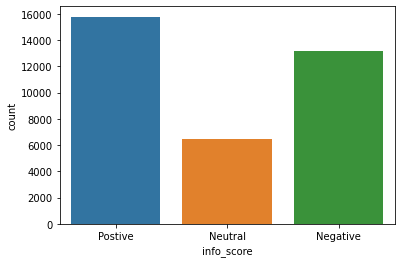

In [ ]:
# perform count plot on info_score column


In the info

there are approx

15500 positive statment

13000 negative statment

6500 neutral statment

In [ ]:
# perform pie chart on info_score column


In the dataset

info contains

44.5% positive statments

37.2% negtive statements

18.3% neutral statments

# modeling on headlines + description

In [ ]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212


LINEAR SUPPORT VECTOR MACHINE


In [ ]:

%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model


# Fit the pipline to the data

#predict on test dataset


#print accuracy

#print confusion matrix

# print classification report


MODEL - LINEAR SVC
accuracy score: 90.98%
[[1164   78   81]
 [  22  619   17]
 [  65   57 1444]]
              precision    recall  f1-score   support

    Negative       0.93      0.88      0.90      1323
     Neutral       0.82      0.94      0.88       658
     Postive       0.94      0.92      0.93      1566

    accuracy                           0.91      3547
   macro avg       0.90      0.91      0.90      3547
weighted avg       0.91      0.91      0.91      3547

CPU times: user 2.1 s, sys: 72.2 ms, total: 2.18 s
Wall time: 2.18 s


LOGISTIC REGRESSION


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression



# Fit the pipeline to the data

#predict on test data


#print accuracy

#print confusion matrix
 
# print classification report
 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MODEL - LOGISTIC REGRESSION
accuracy: 56.16%
[[ 686  183  454]
 [ 156  245  257]
 [ 303  202 1061]]
              precision    recall  f1-score   support

    Negative       0.60      0.52      0.56      1323
     Neutral       0.39      0.37      0.38       658
     Postive       0.60      0.68      0.64      1566

    accuracy                           0.56      3547
   macro avg       0.53      0.52      0.52      3547
weighted avg       0.56      0.56      0.56      3547

CPU times: user 14 s, sys: 9.41 s, total: 23.4 s
Wall time: 14.8 s


MULTINOMIAL NAIVE BAYES


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB


# Fit the pipeline to the data
 
#predict on test data
  
#print accuracy
 
#print confusion matrix
 
# print classification report
 

MULTINOMIAL NAIVE BAYES
accuracy: 56.16%
[[ 686  183  454]
 [ 156  245  257]
 [ 303  202 1061]]
              precision    recall  f1-score   support

    Negative       0.60      0.52      0.56      1323
     Neutral       0.39      0.37      0.38       658
     Postive       0.60      0.68      0.64      1566

    accuracy                           0.56      3547
   macro avg       0.53      0.52      0.52      3547
weighted avg       0.56      0.56      0.56      3547

CPU times: user 5.67 s, sys: 57.6 ms, total: 5.72 s
Wall time: 5.74 s


BERNOULLI NAIVE BAYES


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

# Fit the pipeline to the data
 
#predict on test data
 
#print accuracy
 
#print confusion matrix
 
# print classification report
 

BERNOULLIS NAIVE BAYES
accuracy: 56.16%
[[ 686  183  454]
 [ 156  245  257]
 [ 303  202 1061]]
              precision    recall  f1-score   support

    Negative       0.60      0.52      0.56      1323
     Neutral       0.39      0.37      0.38       658
     Postive       0.60      0.68      0.64      1566

    accuracy                           0.56      3547
   macro avg       0.53      0.52      0.52      3547
weighted avg       0.56      0.56      0.56      3547

CPU times: user 5.64 s, sys: 90 ms, total: 5.73 s
Wall time: 5.73 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier



# Fit the pipeline to the data
 
# predict on test data
 
#print accuracy
 
#print confusion matrix
 
# print classification report
 

GRADIENT BOOST
accuracy: 56.16%
[[ 686  183  454]
 [ 156  245  257]
 [ 303  202 1061]]
              precision    recall  f1-score   support

    Negative       0.60      0.52      0.56      1323
     Neutral       0.39      0.37      0.38       658
     Postive       0.60      0.68      0.64      1566

    accuracy                           0.56      3547
   macro avg       0.53      0.52      0.52      3547
weighted avg       0.56      0.56      0.56      3547

CPU times: user 24 s, sys: 338 ms, total: 24.4 s
Wall time: 24.3 s


XGBOOST CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier


# Fit the pipeline to the data

# predict on test data

#print accuracy

#print confusion matrix

# print classification report


XGBOOST
accuracy: 56.16%
[[ 686  183  454]
 [ 156  245  257]
 [ 303  202 1061]]
              precision    recall  f1-score   support

    Negative       0.60      0.52      0.56      1323
     Neutral       0.39      0.37      0.38       658
     Postive       0.60      0.68      0.64      1566

    accuracy                           0.56      3547
   macro avg       0.53      0.52      0.52      3547
weighted avg       0.56      0.56      0.56      3547

CPU times: user 13 s, sys: 106 ms, total: 13.1 s
Wall time: 13 s


DECISION TREE CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier



# Fit the pipeline to the data

# predict on test data

#print accuracy

#print confusion matrix

# print classification report


DECISION TREE
accuracy: 56.16%
[[ 686  183  454]
 [ 156  245  257]
 [ 303  202 1061]]
              precision    recall  f1-score   support

    Negative       0.60      0.52      0.56      1323
     Neutral       0.39      0.37      0.38       658
     Postive       0.60      0.68      0.64      1566

    accuracy                           0.56      3547
   macro avg       0.53      0.52      0.52      3547
weighted avg       0.56      0.56      0.56      3547

CPU times: user 8.16 s, sys: 33.7 ms, total: 8.2 s
Wall time: 8.21 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier


# Fit the pipeline to the data

# predict on test data

#print accuracy

#print confusion matrix

# print classification report


K NEAREST NEIGHBOR
accuracy: 56.16%
[[ 686  183  454]
 [ 156  245  257]
 [ 303  202 1061]]
              precision    recall  f1-score   support

    Negative       0.60      0.52      0.56      1323
     Neutral       0.39      0.37      0.38       658
     Postive       0.60      0.68      0.64      1566

    accuracy                           0.56      3547
   macro avg       0.53      0.52      0.52      3547
weighted avg       0.56      0.56      0.56      3547

CPU times: user 5.16 s, sys: 31.1 ms, total: 5.19 s
Wall time: 5.21 s


In [ ]:
# helper function for comparing models matric

    # the libraries we need

    # create a dataframe with column matric and metric name as value

    # then predict on the test set
   
    

In [ ]:
# list of model objects

# list of model names

# print the comparison of models


linearSVC
Classification Report 
               precision    recall  f1-score   support

    Negative       0.93      0.75      0.83      1323
     Neutral       0.47      0.99      0.63       658
     Postive       0.96      0.66      0.78      1566

    accuracy                           0.76      3547
   macro avg       0.78      0.80      0.75      3547
weighted avg       0.85      0.76      0.77      3547

---------------------------------------------------------------------------------------
logisitc
Classification Report 
               precision    recall  f1-score   support

    Negative       0.91      0.66      0.76      1323
     Neutral       0.39      0.99      0.56       658
     Postive       0.96      0.56      0.71      1566

    accuracy                           0.68      3547
   macro avg       0.75      0.74      0.68      3547
weighted avg       0.83      0.68      0.70      3547

-----------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report 
               precision    recall  f1-score   support

    Negative       0.77      0.26      0.39      1323
     Neutral       0.25      0.99      0.41       658
     Postive       0.81      0.28      0.42      1566

    accuracy                           0.40      3547
   macro avg       0.61      0.51      0.40      3547
weighted avg       0.69      0.40      0.40      3547

---------------------------------------------------------------------------------------
decisiontree
Classification Report 
               precision    recall  f1-score   support

    Negative       0.77      0.21      0.33      1323
     Neutral       0.25      0.99      0.40       658
     Postive       0.81      0.29      0.42      1566

    accuracy                           0.39      3547
   macro avg       0.61      0.49      0.38      3547
weighted avg       0.69      0.39      0.38      3547

---------------------------------------------------------------------------------------
K

# working with test data

In [ ]:
# Perforn the prediction on the test dataset


array(['Negative', 'Negative', 'Negative', ..., 'Neutral', 'Postive',
       'Postive'], dtype=object)

In [ ]:
# creating a dataframe of predicted results 


0
0  Negative
1  Negative
2  Negative
3  Negative
4   Postive

# now working on headlines

In [ ]:
# from the dataset you have copied before delete the column of description


Headlines                            Time
0  Jim Cramer: A better way to invest in the Covi...   7:51  PM ET Fri, 17 July 2020
1     Cramer's lightning round: I would own Teradyne   7:33  PM ET Fri, 17 July 2020
2  Cramer's week ahead: Big week for earnings, ev...   7:25  PM ET Fri, 17 July 2020
3  IQ Capital CEO Keith Bliss says tech and healt...   4:24  PM ET Fri, 17 July 2020
4  Wall Street delivered the 'kind of pullback I'...   7:36  PM ET Thu, 16 July 2020

In [ ]:
# remane the date column in gaurdian headlines dataset  to time


Time                                          Headlines
0  18-Jul-20   Johnson is asking Santa for a Christmas recovery
1  18-Jul-20  ‘I now fear the worst’: four grim tales of wor...
2  18-Jul-20  Five key areas Sunak must tackle to serve up e...
3  18-Jul-20  Covid-19 leaves firms ‘fatally ill-prepared’ f...
4  18-Jul-20  The Week in Patriarchy  \n\n\n  Bacardi's 'lad...

In [ ]:
# cancatenate the gaurdian headlines dataset and  copy of datasetto get all headlines together


Time                                          Headlines
0  18-Jul-20   Johnson is asking Santa for a Christmas recovery
1  18-Jul-20  ‘I now fear the worst’: four grim tales of wor...
2  18-Jul-20  Five key areas Sunak must tackle to serve up e...
3  18-Jul-20  Covid-19 leaves firms ‘fatally ill-prepared’ f...
4  18-Jul-20  The Week in Patriarchy  \n\n\n  Bacardi's 'lad...

In [ ]:
# check the shape of all headlines dataset


(53258, 2)

In [ ]:
#apply preprocessin to the headlines column in the new dataset
 

Time                                          Headlines
0  18-Jul-20                johnson ask santa christma recoveri
1  18-Jul-20  ‘ fear bad ’ four grim tale work life upend co...
2  18-Jul-20  five key area sunak must tackl serv econom rec...
3  18-Jul-20  covid19 leav firm ‘ fatal illprepar ’ nodeal b...
4  18-Jul-20  week patriarchi bacardi ladi vodka late long l...

In [ ]:
# analyze polarity score of values in headlines and  add new column of it in dataset



Time                                          Headlines  hl_score
0        18-Jul-20                johnson ask santa christma recoveri    0.0000
1        18-Jul-20  ‘ fear bad ’ four grim tale work life upend co...   -0.8860
2        18-Jul-20  five key area sunak must tackl serv econom rec...    0.0000
3        18-Jul-20  covid19 leav firm ‘ fatal illprepar ’ nodeal b...   -0.5423
4        18-Jul-20  week patriarchi bacardi ladi vodka late long l...   -0.4939
...            ...                                                ...       ...
32668  Mar 20 2018  malaysia say never hire british data firm cent...    0.0000
32669  Mar 20 2018  prosecutor search volkswagen headquart new emi...    0.0000
32670  Mar 20 2018            mcdonald set greenhous ga reduct target    0.0000
32671  Mar 20 2018  pratt whitney deliv spare a320neo engin soon i...    0.0000
32672  Mar 20 2018  uk alway consid way improv data law pm may spo...    0.0000

[53258 rows x 3 columns]

In [ ]:
# apply the function  which decides sentiment to  polarity score column


Time                                          Headlines  hl_score
0        18-Jul-20                johnson ask santa christma recoveri   Neutral
1        18-Jul-20  ‘ fear bad ’ four grim tale work life upend co...  Negative
2        18-Jul-20  five key area sunak must tackl serv econom rec...   Neutral
3        18-Jul-20  covid19 leav firm ‘ fatal illprepar ’ nodeal b...  Negative
4        18-Jul-20  week patriarchi bacardi ladi vodka late long l...  Negative
...            ...                                                ...       ...
32668  Mar 20 2018  malaysia say never hire british data firm cent...   Neutral
32669  Mar 20 2018  prosecutor search volkswagen headquart new emi...   Neutral
32670  Mar 20 2018            mcdonald set greenhous ga reduct target   Neutral
32671  Mar 20 2018  pratt whitney deliv spare a320neo engin soon i...   Neutral
32672  Mar 20 2018  uk alway consid way improv data law pm may spo...   Neutral

[53258 rows x 3 columns]

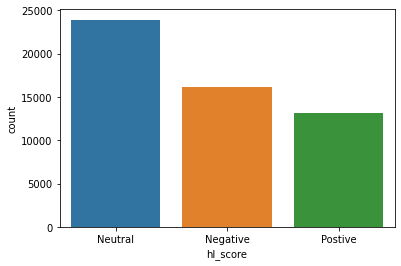

In [ ]:
#perform countplot on headline score column



In the headlines

there are approx

14000 positive statment

16000 negative statment

24000 neutral statment

In [ ]:
#perform pie digram on headline score column



In the dataset

headlines contains

24.8% positive statments

30.3% negtive statements

44.9% neutral statments

# Modeling on headlines

In [ ]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212



LINEAR SUPPORT VECTOR MACHINE

In [ ]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model


# Fit the pipeline to the data

# predict on test dataset

#print accuracy

#print confusion matrix

# print classification report


MODEL - LINEAR SVC
accuracy score: 93.11%
[[1572   37   40]
 [ 111 2106  109]
 [  49   21 1281]]
              precision    recall  f1-score   support

    Negative       0.91      0.95      0.93      1649
     Neutral       0.97      0.91      0.94      2326
     Postive       0.90      0.95      0.92      1351

    accuracy                           0.93      5326
   macro avg       0.93      0.94      0.93      5326
weighted avg       0.93      0.93      0.93      5326

CPU times: user 1.69 s, sys: 79.7 ms, total: 1.77 s
Wall time: 1.77 s


LOGISTIC REGRESSION

In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression



# Fit the pipeline to the data

# predict on test dataset


#print accuracy

#print confusion matrix

# print classification report


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MODEL - LOGISTIC REGRESSION
accuracy: 49.85%
[[1047  150  452]
 [ 608  648 1070]
 [ 233  158  960]]
              precision    recall  f1-score   support

    Negative       0.55      0.63      0.59      1649
     Neutral       0.68      0.28      0.39      2326
     Postive       0.39      0.71      0.50      1351

    accuracy                           0.50      5326
   macro avg       0.54      0.54      0.50      5326
weighted avg       0.57      0.50      0.48      5326

CPU times: user 11.6 s, sys: 6.95 s, total: 18.5 s
Wall time: 12.3 s


MULTINOMIAL NAIVE BAYES


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB


# Fit the pipeline to the data

#predict on test data

#print accuracy

#print confusion matrix

# print classification report


MULTINOMIAL NAIVE BAYES
accuracy: 49.85%
[[1047  150  452]
 [ 608  648 1070]
 [ 233  158  960]]
              precision    recall  f1-score   support

    Negative       0.55      0.63      0.59      1649
     Neutral       0.68      0.28      0.39      2326
     Postive       0.39      0.71      0.50      1351

    accuracy                           0.50      5326
   macro avg       0.54      0.54      0.50      5326
weighted avg       0.57      0.50      0.48      5326

CPU times: user 5.38 s, sys: 100 ms, total: 5.49 s
Wall time: 5.47 s


BERNOULLI NAIVE BAYES


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB


# fit the pipeline to the train data

#predict on test dataset


#print accuracy


#print confusion matrix

# print classification report



BERNOULLIS NAIVE BAYES
accuracy: 49.85%
[[1047  150  452]
 [ 608  648 1070]
 [ 233  158  960]]
              precision    recall  f1-score   support

    Negative       0.55      0.63      0.59      1649
     Neutral       0.68      0.28      0.39      2326
     Postive       0.39      0.71      0.50      1351

    accuracy                           0.50      5326
   macro avg       0.54      0.54      0.50      5326
weighted avg       0.57      0.50      0.48      5326

CPU times: user 5.38 s, sys: 93.5 ms, total: 5.48 s
Wall time: 5.44 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier



# Fit the pipeline to the data


# predict on test data


#print accuracy

#print confusion matrix

# print classification report


GRADIENT BOOST
accuracy: 49.85%
[[1047  150  452]
 [ 608  648 1070]
 [ 233  158  960]]
              precision    recall  f1-score   support

    Negative       0.55      0.63      0.59      1649
     Neutral       0.68      0.28      0.39      2326
     Postive       0.39      0.71      0.50      1351

    accuracy                           0.50      5326
   macro avg       0.54      0.54      0.50      5326
weighted avg       0.57      0.50      0.48      5326

CPU times: user 14.1 s, sys: 952 ms, total: 15 s
Wall time: 15 s


XGBOOST CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier


# Fit the model to the data


# predict on test data


#print accuracy

#print confusion matrix

# print classification report


XGBOOST
accuracy: 49.85%
[[1047  150  452]
 [ 608  648 1070]
 [ 233  158  960]]
              precision    recall  f1-score   support

    Negative       0.55      0.63      0.59      1649
     Neutral       0.68      0.28      0.39      2326
     Postive       0.39      0.71      0.50      1351

    accuracy                           0.50      5326
   macro avg       0.54      0.54      0.50      5326
weighted avg       0.57      0.50      0.48      5326

CPU times: user 8.94 s, sys: 72.1 ms, total: 9.01 s
Wall time: 8.96 s


DECISION TREE CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier



# Fit the pipeline to the data

# predict on test data

#print accuracy

#print confusion matrix

# print classification report


DECISION TREE
accuracy: 49.85%
[[1047  150  452]
 [ 608  648 1070]
 [ 233  158  960]]
              precision    recall  f1-score   support

    Negative       0.55      0.63      0.59      1649
     Neutral       0.68      0.28      0.39      2326
     Postive       0.39      0.71      0.50      1351

    accuracy                           0.50      5326
   macro avg       0.54      0.54      0.50      5326
weighted avg       0.57      0.50      0.48      5326

CPU times: user 6.49 s, sys: 65.3 ms, total: 6.55 s
Wall time: 6.54 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier


# Fit the pipeline to the data


# prect on test data


#print accuracy


#print confusion matrix


# print classification report



K NEAREST NEIGHBOR
accuracy: 49.85%
[[1047  150  452]
 [ 608  648 1070]
 [ 233  158  960]]
              precision    recall  f1-score   support

    Negative       0.55      0.63      0.59      1649
     Neutral       0.68      0.28      0.39      2326
     Postive       0.39      0.71      0.50      1351

    accuracy                           0.50      5326
   macro avg       0.54      0.54      0.50      5326
weighted avg       0.57      0.50      0.48      5326

CPU times: user 5.28 s, sys: 72.2 ms, total: 5.36 s
Wall time: 5.35 s


In [ ]:
# helper function for comparing models matric

    # the libraries we need
   

    # create a dataframe with column matric and metric name as value
   
   
    # then predict on the test set
     

In [ ]:
# list of model objects

# list of model names

# print the comparison of models


linearSVC
Classification Report 
               precision    recall  f1-score   support

    Negative       0.97      0.95      0.96      1649
     Neutral       0.98      1.00      0.99      2326
     Postive       0.97      0.96      0.96      1351

    accuracy                           0.97      5326
   macro avg       0.97      0.97      0.97      5326
weighted avg       0.97      0.97      0.97      5326

---------------------------------------------------------------------------------------
logisitc
Classification Report 
               precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      1649
     Neutral       0.92      1.00      0.96      2326
     Postive       0.96      0.90      0.93      1351

    accuracy                           0.94      5326
   macro avg       0.95      0.93      0.94      5326
weighted avg       0.94      0.94      0.94      5326

-----------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report 
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1649
     Neutral       0.44      1.00      0.61      2326
     Postive       0.00      0.00      0.00      1351

    accuracy                           0.44      5326
   macro avg       0.15      0.33      0.20      5326
weighted avg       0.19      0.44      0.27      5326

---------------------------------------------------------------------------------------
XGB
Classification Report 
               precision    recall  f1-score   support

    Negative       0.93      0.27      0.42      1649
     Neutral       0.53      1.00      0.69      2326
     Postive       0.87      0.30      0.45      1351

    accuracy                           0.60      5326
   macro avg       0.78      0.52      0.52      5326
weighted avg       0.74      0.60      0.55      5326

---------------------------------------------------------------------------------------
decisiontr

# now working with test data

In [ ]:
# Perforn the prediction on the test dataset


array(['Postive', 'Negative', 'Neutral', ..., 'Neutral', 'Postive',
       'Postive'], dtype=object)

In [ ]:
# creating a dataframe of predicted results 


0
0   Postive
1  Negative
2   Neutral
3  Negative
4   Neutral

# Prediction

you can check the result on real time news headlines

Here i have used two fiancial news headlines

and predicted its sentiment

You can try more 

In [ ]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = linear_svc_model_hl.predict(sent1)
y_predict

array(['Negative'], dtype=object)

In [ ]:
sent2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = linear_svc_model_hl.predict(sent2)
y_predict

array(['Postive'], dtype=object)

# Conclusion

We learn about NLTK, sentiment analysis in this assigment.

we conclude that using nltk it is easy to classify financial news and more we improve the traning data more we can get accurate


#Congratulation for completing the assignment.


You have learned a lot while doing this assignment.